In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

In [34]:
x=np.array([[3.0,5],[5,1],[11,6],[6,7],[2,4],[12,4],[8,2],[8,4],[10,4],[6,1]])
x= x/np.amax(x, axis=0)
y=np.array([[75.0],[82],[93],[81],[55],[62],[96],[85],[51],[81]])
y = y/100.0

In [35]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoidPrime(x):
    return sigmoid(x)*(1-sigmoid(x))
    
class Neural_Network(object):
    def __init__(self,learningRateGrad=3.0,momentum=0.1,loopsGrad=1000,hiddenLayers=3,hiddenLayers2=3):
        #Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = hiddenLayers
        self.hiddenLayerSize2 =hiddenLayers2
        
        self.learningRate = learningRateGrad
        self.maxRange=loopsGrad
        self.costArray=[]
        self.momentum = momentum

        #Initialize Weights
        np.random.seed(5)
        self.W1 = np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize,self.hiddenLayerSize2)
        self.W3 = np.random.rand(self.hiddenLayerSize2,self.outputLayerSize)
        
        self.B2 = np.random.rand(1,self.hiddenLayerSize)
        self.B3 = np.random.rand(1,self.hiddenLayerSize2)
        self.Boutput = np.random.rand(1,self.outputLayerSize)
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) + self.B2
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2) + self.B3
        self.a3 = sigmoid(self.z3)
        self.z4 = np.dot(self.a3,self.W3) + self.Boutput
        yHat = sigmoid(self.z4)
        return yHat
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        return(np.sum(0.5*(y-self.yHat)**2))
        
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        
        delta4 = np.multiply(-(y-self.yHat), sigmoidPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        
        delta3 = np.dot(delta4, self.W3.T)*sigmoidPrime(self.z3)
        dJdW2 = np.dot(self.a2.T, delta3)
        delta2 = np.dot(delta3, self.W2.T)*sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2, dJdW3, delta2, delta3, delta4
    
    def train(self,x,y):
        for i in xrange(self.maxRange):
            dJdW1, dJdW2, dJdW3, delta2, delta3, delta4 = self.costFunctionPrime(x, y)
            self.W1 += -self.learningRate*dJdW1
            self.W2 += -self.learningRate*dJdW2
            self.W3 += -self.learningRate*dJdW3

            self.B2 += -self.learningRate*delta2
            self.B3 += -self.learningRate*delta3
            self.Boutput += -self.learningRate*delta4
            self.costArray.append(self.costFunction(x,y))
    
    def trainMomentum(self,x,y):
        for elementIndex in range(len(x)):
            precedentUp1=np.zeros([self.inputLayerSize,self.hiddenLayerSize])
            precedentUp2=np.zeros([self.hiddenLayerSize,self.hiddenLayerSize2])
            precedentUp3=np.zeros([self.hiddenLayerSize2,self.outputLayerSize])
            for i in xrange(self.maxRange):
                dJdW1, dJdW2, dJdW3 = self.costFunctionPrime(x[elementIndex,:], y)
                update1 = self.learningRate*dJdW1
                update2 = self.learningRate*dJdW2
                update3 = self.learningRate*dJdW3
                velocity1 = precedentUp1*self.momentum
                velocity2 = precedentUp2*self.momentum
                velocity3 = precedentUp3*self.momentum
                self.W1 = self.W1 + velocity1 - update1
                self.W2 = self.W2 + velocity2 - update2
                self.W3 = self.W3 + velocity3 - update3
                precedentUp1 = update1
                precedentUp2 = update2
                precedentUp3 = update3
                self.costArray.append(self.costFunction(x,y))
        

In [36]:
NN=Neural_Network(1.0,0.2,1000,2,2)
for i in range(20):
    NN.train(np.array([[Dinput[i,0]],[Dinput[i,1]]]).T,Doutput[0])


In [37]:
# NN=Neural_Network(1,0.2,10,4,4)
# NN.train(Dinput,Doutput)
X = np.arange(0, 1, 0.01,dtype=np.float)
Y = np.arange(0, 1, 0.01,dtype=np.float)
X, Y = np.meshgrid(X, Y)
S=X.shape

In [38]:
Y=Y.ravel()
X=X.ravel()
Z=np.zeros_like(X)

In [39]:
for i in range(len(Y)):
    movingInput=np.array([X[i],Y[i]]).T
    Z[i]=NN.forward(movingInput)

X=X.reshape(S)
Y=Y.reshape(S)
Z=Z.reshape(S)

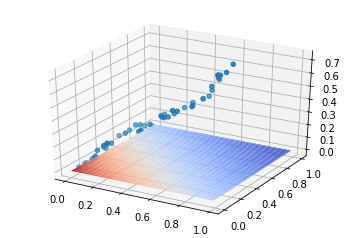

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z,cmap='coolwarm')
ax.scatter3D(xs=Dinput.T[0], ys=Dinput.T[1], zs=Doutput.T)
plt.show()

In [45]:
LearningRateArray=[0.1,0.025,0.05,0.1]
for i in LearningRateArray:
    NN=Neural_Network(i,0,1000,5,5)
    NN.train(Dinput,Doutput)
    plt.plot(range(len(NN.costArray)),NN.costArray,label=str(i))
plt.legend()
plt.show()

ValueError: non-broadcastable output operand with shape (1,5) doesn't match the broadcast shape (51,5)

In [ ]:
LearningRateArray=[0.01,0.025,0.05,0.1]
for i in LearningRateArray:
    NN=Neural_Network(i,0.5,100,5)
    NN.trainMomentum(Dinput,Doutput)
    plt.plot(range(len(NN.costArray)),NN.costArray,label=str(i))
plt.legend()
plt.show()

In [ ]:
LearningRate=0.1
Momentum=0.5
loops=10000
neurons=3

NN=Neural_Network(LearningRate,Momentum,loops,neurons)
NN.train(Dinput,Doutput)
plt.plot(range(len(NN.costArray)),NN.costArray,label='Vanilla')

NN=Neural_Network(LearningRate,Momentum,loops,neurons)
NN.trainMomentum(Dinput,Doutput)
plt.plot(range(len(NN.costArray)),NN.costArray,label='Momentum')

plt.legend()
plt.show()

In [ ]:
# Import data
co2_df = pd.read_csv('global.csv')
temp_df = pd.read_csv('annual.csv')

# Clean data
co2_df = co2_df.ix[:,:2]                     # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)                # Reset index

temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        # Reset index
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)                                             # Reset index

print(co2_df.head())
print(temp_df.head())

In [42]:
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)
print(climate_change_df.head())

   Year   CO2  Temperature
0  1960  2569       0.0204
1  1961  2580       0.0775
2  1962  2686       0.0888
3  1963  2833       0.1068
4  1964  2995      -0.1495


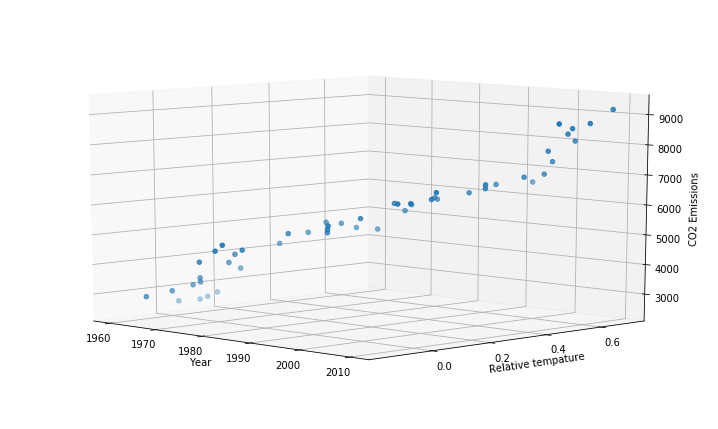

In [43]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

In [44]:
Dinput=np.array([climate_change_df['Year'],climate_change_df['Temperature']]).T
Doutput=np.array([climate_change_df['CO2']],dtype=np.float).T
Dinput= Dinput-np.amin(Dinput, axis=0)
Dinput= Dinput/(1.4*np.amax(Dinput, axis=0))
Doutput= Doutput-np.amin(Doutput.ravel())
Doutput=Doutput/(1.4*np.max(Doutput.ravel()))